# Numpy: array multidimensionali efficienti


Grandi quantità di dati hanno spesso una struttura indicizzata. Per esempio una sequenza di numeri in una serie temporale

$a_0, a_2, \ldots, a_n$

oppure una matrice che è una struttura con 2 dimensioni (righe e colonne).

$$
\begin{equation}
\begin{bmatrix}
1 & 2 & 3 & 4 & 5 & 6\\
7 & 8 & 9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16 & 17 & 18
\end{bmatrix}
\end{equation}
$$

Pensate ad esempio ad una distribuzione di probabilità su tre variabili casuali $X$, $Y$, $Z$ distribuite tutte su un supporto finito (ad esempio $0,...,n-1$ per un certo valore $n$). Possiamo allora rappresentare questa distribuzione come una collezione di valori indicizzata da tre numeri

$$
P(i,j,k)  \quad \text{for $i$,$j$, $k$ $\in\{0,\ldots ,n-1\}$}
$$




## Rappresentazione standard in Python

Abbiamo visto che python supporta facilmente sequenze di valori, e attraverso l'annidamento di liste si possono definite matrici o sequenze multidimensionali a piacere.

In [6]:
X = list(range(0,10))
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

La funzione che andiamo a scrivere crea un array d-dimesionale di lunghezza $N$ lungo tutte le dimensioni.
- se $d=0$, allora è un numero
- se $d=1$, allora è una lista di numeri
- se $d=2$, allora è una matrice $NxN$
- ...

In [1]:
import random
from matplotlib.pyplot import matshow

def creaarray(N,d):
    "Crea un array NxNxN..xN a d dimensioni, riempito di valori casuali."
    if d<0:
        raise ValueError
    if d==0:
        return round(random.random(),ndigits=2)
    result = []
    for i in range(N):
        result.append(creaarray(N,d-1))
    return result

In [2]:
creaarray(5,0)

0.08

In [3]:
creaarray(5,1)

[0.28, 0.91, 0.07, 0.35, 0.36]

0.53


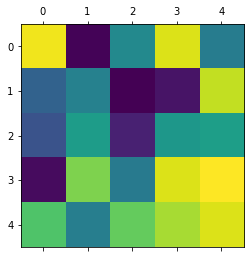

In [4]:
M=creaarray(5,2)
print(M[2][3])
matshow(M)

In [38]:
M = creaarray(5,4) # array 4-dimensionale

M[2][3][3][1]

0.45

## Ma allora perché Numpy?

Python è un linguaggio molto flessibile e potente, tuttavia tutta questa flessibilità ha un costo: i dati all'interno di un array possono avere dimensioni differenti e addirittura tipi differenti. Ogni operazione in python si traduce in moltissime operazioni in linguaggio macchina. Anche la posizione in memoria dei dati conta: i processori hanno vari livelli di memorie **cache**. Senza entrare nel dettaglio sappiate solo che accedere a dati in memoria che sono vicini tra loro è più efficiente.

- disomogeneità dei dati
- dati collocati in memoria in posizioni imprevedibili
- un'operazione python corrisponde a molte operazioni del processore

Numpy utilizza una strategia differente per la memorizzazione di grandi quantità di dati

- dati di dimensione e tipo fisso
- dati memorizzati sequenzialmente
- operazioni più semplici
- parallelizzazione
- meno flessibilità

Prima di immergerci nelle caratteristiche di numpy, cerchiamo di capire se ne vale la pena.
Vediamo un esempio dello stesso calcolo fatto con liste Python e con array 1-dimensionaly numpy. Vediamo la differenza nei tempi di esecuzione.

In [43]:
import numpy as np

array_numpy = np.arange(0,100000,1)
array_python = [x for x in range(100000)]
print(len(array_numpy))
print(len(array_python))

100000
100000


In [44]:
%timeit sum(array_python)

660 µs ± 25.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
%timeit np.sum(array_numpy)

41.8 µs ± 625 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Somma delle righe

Vediamo un altro esempio. Prendiamo una matrice numerica 1000x1000 generata a caso, e ne calcoliamo la somma delle righe utilizzando
- una funzione scritta in python
- usando la funzione `sum` predefinita nella libreria standad python
- usando numpy


In [62]:
# Lista di liste
M = creaarray(1000,2)

def somma_di_righe1(matrice):
    res = []
    for riga in matrice:
        somma = 0
        for v in riga:
            somma += v
        res.append(somma)
    return res    
    
%timeit somma_di_righe1(M)

22.8 ms ± 598 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
def somma_di_righe2(matrice):
    return [sum(riga) for riga in matrice]

%timeit somma_di_righe2(M)

4.59 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
# numpy array

M = np.random.random(size=(1000,1000))

%timeit np.sum(M,axis=1) # somma muovendo l'indice di colonna

504 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Passare dall'implementazione manuale all'uso di `sum` ha ridotto il tempo di esecuzione a 1/4 o 1/5. 

Passare all'uso di `numpy` ha ridotto ulteriormente il tempo di esecuzione di una altro fattore 10!


### Somma delle colonne

Facciamo adesso la stessa cosa sommando le colonne. Osserivamo però che per come sono strutturati i dati, **non è più possibile usare la funzione `sum`**.



In [65]:
# Lista di liste
M = creaarray(1000,2)

def somma_di_colonne(matrice):
    res = []
    R,C = len(M),len(M[0])
    for j in range(C):
        somma = 0
        for i in range(R):
            somma += M[i][j]
        res.append(somma)
    return res    
    
%timeit somma_di_colonne(M)

90.3 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
# numpy array

M = np.random.random(size=(1000,1000))

%timeit np.sum(M,axis=0) # somma muovendo l'indice di riga

505 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Mentre sommiamo lungo le colonne, la rappresentazione python come lista di righe rende il calcolo più complicato e lento. Il cambio di direzione invece non influisce minimamente dell'array numpy.

*La differenza del tempo di esecuzione è di un fattore 200!*


Spero che questa piccola dimostrazione vi convinca che vale la pena imparare usare `numpy` se avete intenzione di fare calcoli con dati di dimensioni importanti.

## La struttura dei dati in numpy

Spero di avervi convinto che usare numpy è vantaggioso in molti scenari. Prima di vedere esattamente quali funzionalità forniscono gli array multidimensionali di numpy, spostiamoci sulla lavagna (virtuale) e vediamo di capirne la struttura. 

## Creazione e indicizzazione

Vediamo come creare un array multidimensionale con numpy, e vediamo come usare gli indici per accedere ai suoi valori. 

Iniziando importando numpy: visto che si usano molte funzioni da numpy, tipicamente si abbrevia il nome del pacchetto in fase di importazione per renderere le chiamate più brevi. L'abbreviazione `np` è molto comune in letteratura e perciò è consigliata.

In [6]:
import numpy as np

# Creazione di un array di 3-dimensionale 3x5x5 
#
# ogni cella contiene un numero intero a 32 bit
#
# I dati *non* sono inizializzati

V = np.ndarray((5,3,4),'float32')
V

array([[[-1.9447372e+22,  3.0611365e-41,  0.0000000e+00,  0.0000000e+00],
        [ 4.6200980e-02,  4.6200980e-02,  4.6200980e-02,  1.1692442e-19],
        [ 2.5620078e+03,  2.9386312e+29,  1.1719100e-32,  1.3563156e-19]],

       [[ 9.8439425e-12,  9.8439425e-12,  1.3563128e-19,  1.8578386e-01],
        [ 2.0700732e-19,  2.9478562e+29,  7.9309520e+34,  2.3369673e-15],
        [ 3.7125173e-14,  1.3563128e-19,  1.8578386e-01,  5.5568106e-11]],

       [[ 2.8706052e+32,  1.8468116e+25,  1.3555978e-19,  8.5282820e-33],
        [ 1.3563156e-19,  1.6114220e-19,  3.9173499e-02,  5.4667493e-11],
        [ 3.0880990e+29,  1.9734509e+23,  8.1444302e-33,  1.3563156e-19]],

       [[ 1.6114220e-19,  1.3181421e+25,  1.8540734e+25,  1.8062688e+28],
        [ 1.3563128e-19,  1.1705309e-19,  1.5637255e-01,  1.1823856e+22],
        [ 1.6019661e-19,  1.2871340e+22,  7.0975523e+22,  2.3364099e-15]],

       [[ 1.1093670e+27,  2.3759545e-12,  5.4872711e-05,  4.9107552e-14],
        [ 1.3563128e-19,  1.85

In [3]:
# Ogni cella è indicizzata da una tupla di indici i1,i2,... 
# di lunghezza pari alla dimensione dell'array
V[0,0,0]

0.00088472385

In [4]:
# Accesso fuori dal range della coordinata 0 (i.e. axis 0)
V[5,0,0]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [5]:
V[1,2,2]

-5.643574e+35

### Dati non inizializzati

Il contenuto dell'array non è inizializzato, nel senso che l'array viene posizionato in qualche punto della memoria del computer, e il contenuto dell'array è qualunque cosa ci sia in memoria in quel momento.

Questo è *molto rapido* perché non richiede di scorrere tutte le celle per assegnargli un valore iniziale (per esempio zero). 

Tuttavia è ovvio che non si può scrivere un programma che faccia affidamento sul valore iniziale di quelle celle. 

**Quando si lavora a 'basso livello' è necessario preoccuparsi di queste cose**

**Compromesso tra efficienza e semplicità**

### Elementi fondamentali di un array multidimensionale

Un array multidimensionale ha alcuni attributi che ne descrivono le caratteristiche principali

- `ndim`   quante dimensioni ha l'array (ovvero quanti assi)
- `shape`  l'estensione lungo ogni dimensione 
- `size`   il numero totale di elementi
- `dtype`  il tipo di elementi nell'array
- `nbytes` in numero di bytes totali utilizzati per memorizzare i dati

In [7]:
print(type(V))
print("ndim  :", V.ndim)
print("shape :", V.shape)
print("size  :", V.size)
print("dtype :", V.dtype)
print("nbytes:", V.nbytes)


<class 'numpy.ndarray'>
ndim  : 3
shape : (5, 3, 4)
size  : 60
dtype : float32
nbytes: 240


### Creiamo un array con dei dati indicati come argomento

Possiamo creare un array inizializzandolo con dei dati predeterminati usando in metodo `array`

In [8]:
A = np.array([1,2,3,4])

In [9]:
print(type(A))
print("ndim  :", A.ndim)
print("shape :", A.shape)
print("size  :", A.size)
print("dtype :", A.dtype)
print("nbytes:", A.nbytes)

<class 'numpy.ndarray'>
ndim  : 1
shape : (4,)
size  : 4
dtype : int64
nbytes: 32


In [10]:
B = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

In [11]:
print(type(B))
print("ndim  :", B.ndim)
print("shape :", B.shape)
print("size  :", B.size)
print("dtype :", B.dtype)
print("nbytes:", B.nbytes)

<class 'numpy.ndarray'>
ndim  : 2
shape : (3, 4)
size  : 12
dtype : int64
nbytes: 96


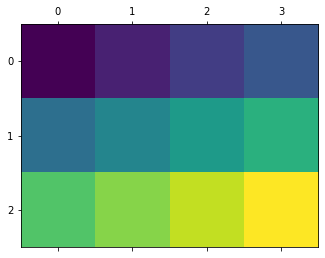

In [13]:
matshow(B)

### I tipi di dati numerici supportati

Gli array numerici numpy di solito contengono tipi di dati di dimensione fissa, di 8, 16, 32, 64 o 128 bit, che rappresentano numeri interi, reali o complessi. 

Al contrario degli interi standard python questi hanno una dimensione fissa e quindi possono rappresentare valori in un range limitato.


| dtype | varianti |  |
|--- | --- | ---
|int | int8, int16, int32, int64 | Interi con segno |
|uint |  uint8, uint16, uint32, uint64 | Interi senza segno
|bool|  Bool | vero o falso |
|float| float16, float32, float64, float128 | Numeri reali
|complex| complex64, complex128, complex256 | Numeri complessi

In [22]:
A = np.array([1.2,3.2,-0.4],'float32')
B = np.array([1.2,3.2,-0.4],'float64')
C = np.array([1.2,3.2,-0.4],'float')
A.dtype, B.dtype, C.dtype

(dtype('float32'), dtype('float64'), dtype('float64'))